## Machine Learning For Social Science Assignment 2
Michelle Zhuang mz3067

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import cross validation lib
from sklearn.model_selection import cross_val_score

#knn lib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# OLS lib
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#ridge lib
from sklearn.linear_model import Ridge

#lasso lib
from sklearn.linear_model import Lasso

#preprocessing lib
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#logistic regression lib
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

# Part A

## Q1
**Use the following url to import the data: https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv**

In [59]:
path = "https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv"
data = pd.read_csv(path)
data

,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,704.300049,0.198171,7290.338867,16.474134,28.716999,5.995935,700.900024,707.700012
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,706.750000,0.193609,5741.462891,17.862625,41.734108,4.726101,704.000000,709.500000
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.150000,3.563500,37.193802,45,645.000000,0.102041,4402.831543,21.885857,23.733000,24.263039,648.299988,641.700012
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.000000,11.881200,59.405899,14,672.200012,0.138614,4776.336426,20.200001,9.952000,2.970297,667.900024,676.500000


## Q2
**Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.**

I want to choose computers, expenditure and income as target feature
*  computer
*  expnstu
*  avginc

In [60]:
# store the columns in new variables
explanatory_features = ['computer', 'expnstu', 'avginc']
target_features = ['testscr']

visualization of the target feature

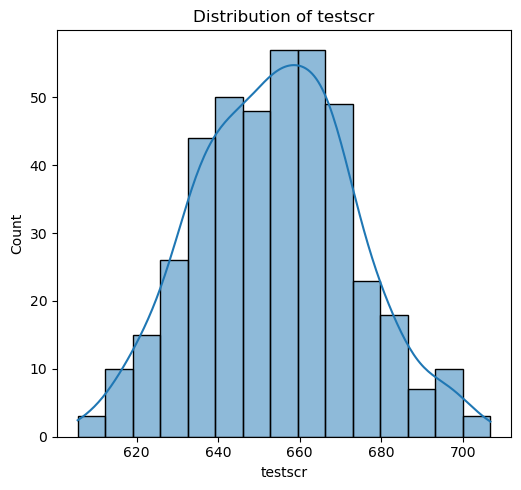

In [61]:
plt.figure(figsize=(10, 5))
for i, target in enumerate(target_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(data[target], kde=True)
    plt.title(f'Distribution of {target}')
    
plt.tight_layout()
plt.show()

now, i put three features together for better comparison

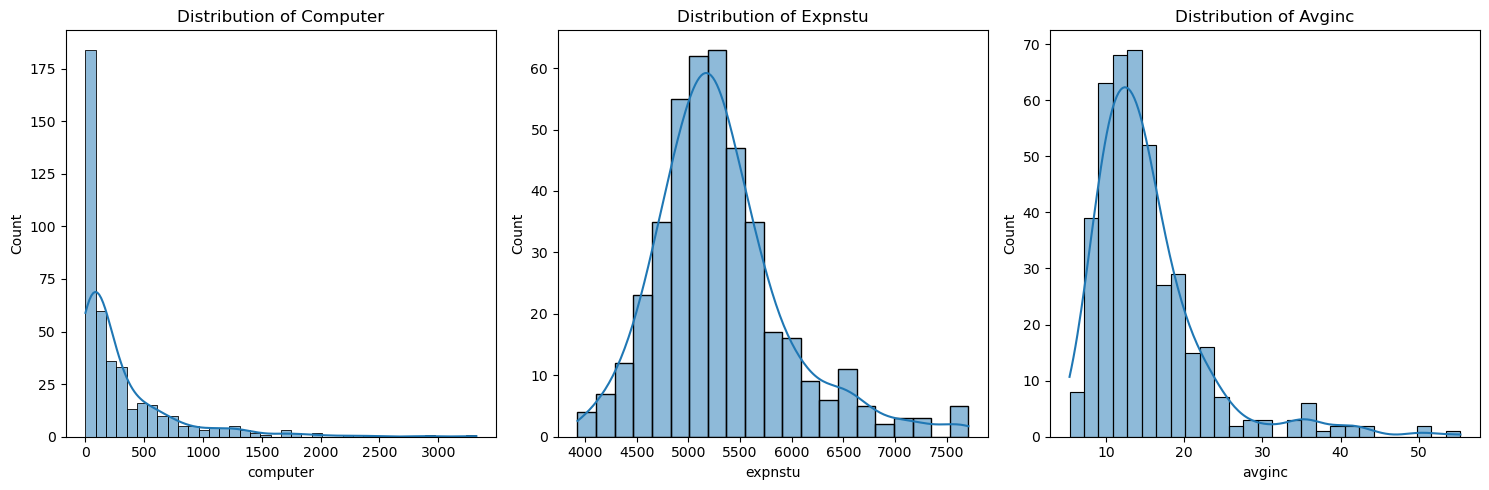

In [62]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(explanatory_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    
plt.tight_layout()
plt.show()

## Q3
**Visualize the dependency of the target on each feature you just plotted.**

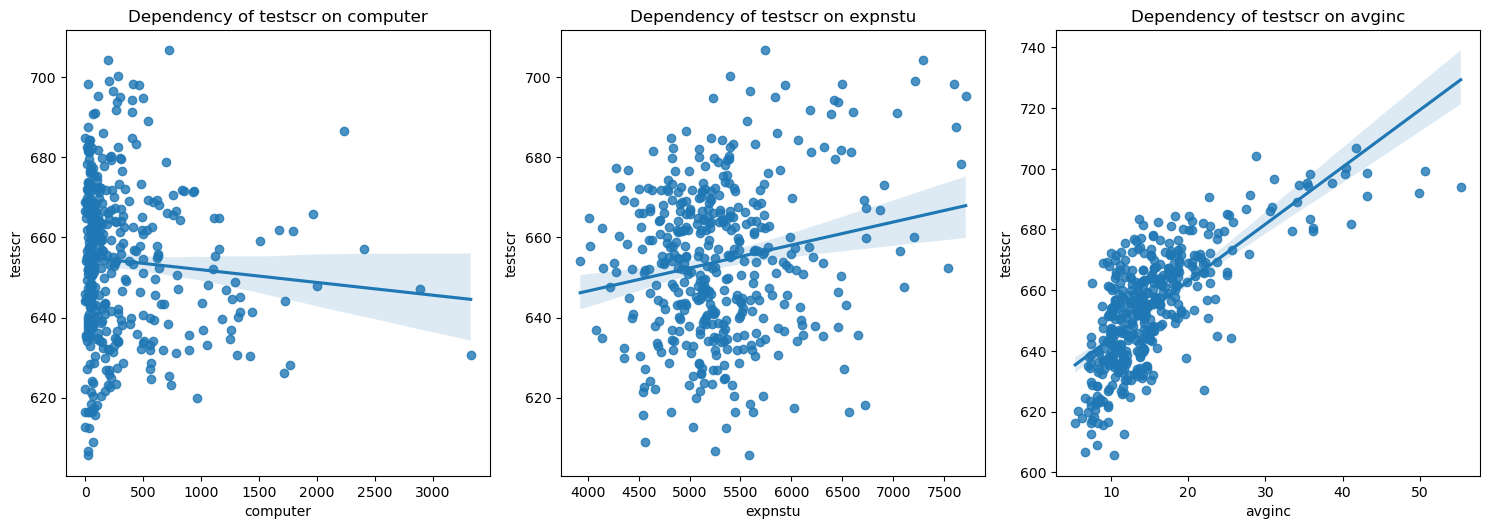

In [63]:
plt.figure(figsize=(15, 10))
for i, target in enumerate(target_features):
    for j, feature in enumerate(explanatory_features):
        plt.subplot(2, 3, i * 3 + j + 1) 
        sns.regplot(x=feature, y=target, data=data)
        plt.title(f'Dependency of {target} on {feature}')

plt.tight_layout()
plt.show()

## Q4
**Split the data into training and test sets. Build models that evaluate the relationship between all available quantitative X variables in the California test dataset and the target variable. Evaluate KNN (for regression), Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. How different are the results?**

the quantitative variables from the data sets are: 'computer', 'expnstu', 'avginc', 'teachers', 'str', 'calwpct', 'mealpct' 

In [64]:
X = data[['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu', 'expnstu', 'str', 'avginc', 'elpct']]  
y = data['testscr']  

In [65]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### KNN model

In [66]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('accuracy: {:.2f}'.format(knn_model.score(X_test, y_test)))
print(f"R² Score : {r2}")

# cross validation
cv_scores_knn = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=5, scoring="r2")
print(f'cv score: {np.mean(cv_scores_knn)}')

accuracy: 0.06
R² Score : 0.064585960944466
cv score: -0.05272196732030947


#### OLS model

In [67]:
lr = LinearRegression()
lr.fit(X_train, y_train)
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr.coef_})
intercept_df = pd.DataFrame({'Feature': ['Intercept'],'Coefficient': [lr.intercept_]})
result_df = pd.concat([intercept_df, coefficients_df])
display(result_df)

,Feature,Coefficient
0,Intercept,674.310899
0,enrltot,0.000658
1,teachers,-0.018395
2,calwpct,-0.066289
3,mealpct,-0.396104
4,computer,0.002352
5,compstu,-3.366961
6,expnstu,0.001387
7,str,-0.688003
8,avginc,0.496722


In [68]:
print("Training set score:", lr.score(X_train, y_train))
print("Testing set score:", lr.score(X_test, y_test))

#cross validation
cv_scores_lr = cross_val_score( LinearRegression(), X_train, y_train, cv=5, scoring="r2")
print(f'cv score: {np.mean(cv_scores_lr)}')

Training set score: 0.8064185694826883
Testing set score: 0.801794953018093
cv score: 0.773119037220847


#### Ridge model

In [69]:
ridge = Ridge(max_iter = 10000).fit(X_train, y_train)
print("Training set score:", ridge.score(X_train, y_train))
print("Testing set score:", ridge.score(X_test, y_test))

#cross validation
cv_scores_ridge = cross_val_score(Ridge(), X_train, y_train, cv=5, scoring="r2")
print(f'cv score: {np.mean(cv_scores_ridge)}')

Training set score: 0.8063929969033703
Testing set score: 0.8031543641861024
cv score: 0.7736073319482955


#### Lasso model

In [70]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score:", lasso.score(X_train, y_train))
print("Testing set score:", lasso.score(X_test, y_test))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

#cross validation
cv_scores_lasso = cross_val_score(Lasso(max_iter = 10000), X_train, y_train, cv=5, scoring="r2")
print(f'cv score: {np.mean(cv_scores_lasso)}')

Training set score: 0.8044539063359661
Testing set score: 0.8087571587040835
Number of features used: 9
cv score: 0.7743891245328789


**i also write a function for better efficiency in Q2**

In [71]:
def run_model(model_obj, X_train, y_train, X_test, y_test):
    model = model_obj.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    return train_score, test_score, np.mean(cv_scores)

## Q5
**Try running your models from the previous question with and without StandardScaler. Does using StandardScaler help?**

In [72]:
def run_model_standardized(model_obj, X_train, y_train, X_test, y_test, Stand = bool()):
    if Stand:
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    model = model_obj.fit(X_train_scaled, y_train)
    
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    #print("Training set score:", train_score)
    #print("Testing set score:", test_score)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="r2")
    #print(f'cv score: {np.mean(cv_scores)}')
    return train_score, test_score, np.mean(cv_scores)

In [73]:
models = {
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'LinearRegression': LinearRegression(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

results_list = []
for name, model in models.items():
    for standard in [False, True]:
        train_score, test_score, cv_score = run_model_standardized(model, X_train, y_train, X_test, y_test, Stand=standard)
        results_list.append({
            'Model': name,
            'Standardized': 'Yes' if standard else 'No',
            'Train Score': train_score,
            'Test Score': test_score,
            'CV Score': cv_score
        })

results_df = pd.DataFrame(results_list)
results_df

,Model,Standardized,Train Score,Test Score,CV Score
0,Lasso,No,0.804454,0.808757,0.774457
1,Lasso,Yes,0.798671,0.782552,0.778853
2,Ridge,No,0.806393,0.803154,0.773607
3,Ridge,Yes,0.806364,0.802755,0.775713
4,LinearRegression,No,0.806419,0.801795,0.773119
5,LinearRegression,Yes,0.806419,0.801795,0.773119
6,KNeighborsRegressor,No,0.320318,0.064586,-0.052722
7,KNeighborsRegressor,Yes,0.807897,0.796836,0.704492


## Q6
**Tune the parameters of the models where possible using GridSearchCV. Do the results improve?**

In [74]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Gridsearchcv on KNN

In [75]:
param_grid_knn = {'n_neighbors': np.arange(1, 15, 2)}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid_knn, cv=10)
grid_knn.fit(X_train, y_train)
print("best mean cross-validation score: {:.1f}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))
print("test-set score: {:.3f}".format(grid_knn.score(X_test, y_test)))

best mean cross-validation score: -0.0
best parameters: {'n_neighbors': 13}
test-set score: 0.080


#### Gridsearcv on ridge

In [76]:
param_grid_ridge = {'alpha': np.logspace(-3, 3, 7)} 
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='r2')
grid_ridge.fit(X_train_scaled, y_train)
print("Best cross-validation R^2 score (with GridSearch): {:.2f}".format(grid_ridge.best_score_))
print("Best alpha: {}".format(grid_ridge.best_params_))
test_score = grid_ridge.score(X_test_scaled, y_test)
print("Test-set R^2 score (with GridSearch): {:.3f}".format(test_score))

Best cross-validation R^2 score (with GridSearch): 0.78
Best alpha: {'alpha': 10.0}
Test-set R^2 score (with GridSearch): 0.804


#### Gridsearch on lasso

In [77]:
param_grid_lasso = {'alpha': np.logspace(-3, 3, 7)}  # Alpha values: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='r2')
grid_lasso.fit(X_train_scaled, y_train)
print("Best cross-validation R^2 score (with GridSearch): {:.2f}".format(grid_lasso.best_score_))
print("Best alpha: {}".format(grid_lasso.best_params_))
test_score = grid_lasso.score(X_test_scaled, y_test)
print("Test-set R^2 score (with GridSearch): {:.3f}".format(test_score))

Best cross-validation R^2 score (with GridSearch): 0.78
Best alpha: {'alpha': 0.1}
Test-set R^2 score (with GridSearch): 0.802


**i also write a function for better efficiency in Q2**

In [78]:
def run_model_grid(model_obj, X_train, y_train, X_test, y_test, Stand=True, param_grid=None):
    if Stand:
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    if param_grid is not None:
        grid_search = GridSearchCV(model_obj, param_grid, cv=5, scoring='r2')
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        grid_search_best_score = grid_search.best_score_
        print(best_model)
    else:
        best_model = model_obj.fit(X_train_scaled, y_train)
        grid_search_best_score = None  # No grid search in this case
        print(best_model)
    
    train_score = best_model.score(X_train_scaled, y_train)
    test_score = best_model.score(X_test_scaled, y_test)
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring="r2")
    
    return train_score, test_score, np.mean(cv_scores), grid_search_best_score

In [79]:
# the function arguement, changes varies different questions
models = {
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'LinearRegression': LinearRegression(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

param_grids = {
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Ridge': {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
    'LinearRegression': {},  # No parameters to tune
    'KNeighborsRegressor': {'n_neighbors': [3, 5, 7, 9]}
}

results_grid = []
for name, model in models.items():
    param_grid = param_grids[name]  # Get the parameter grid for the current model
    
    for grid in [False, True]:
        if grid:
            param_grid_to_use = param_grid  
        else:
            param_grid_to_use = None 
        
        train_score, test_score, cv_score, grid_search_best_score = run_model_grid(
            model_obj=model,
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            Stand=True,  
            param_grid=param_grid_to_use
        )
        results_grid.append({
            'Model': name,
            'GridSearch': 'Yes' if grid else 'No',
            'Train Score': train_score,
            'Test Score': test_score,
            'CV Score': cv_score,
            'Best GridSearchCV Score': grid_search_best_score if grid else 'N/A'
        })

grid_results = pd.DataFrame(results_grid)
grid_results

Lasso()
Lasso(alpha=0.1)
Ridge()
Ridge(alpha=10)
LinearRegression()
LinearRegression()
KNeighborsRegressor()
KNeighborsRegressor(n_neighbors=7)


,Model,GridSearch,Train Score,Test Score,CV Score,Best GridSearchCV Score
0,Lasso,No,0.798671,0.782552,0.778853,N/A
1,Lasso,Yes,0.805981,0.802103,0.779332,0.779332
2,Ridge,No,0.806364,0.802755,0.775713,N/A
3,Ridge,Yes,0.805634,0.803630,0.778718,0.778718
4,LinearRegression,No,0.806419,0.801795,0.773119,N/A
5,LinearRegression,Yes,0.806419,0.801795,0.773119,0.773119
6,KNeighborsRegressor,No,0.807897,0.796836,0.704492,N/A
7,KNeighborsRegressor,Yes,0.801607,0.789298,0.710757,0.710757


## Q7
**Compare the coefficients of your two best linear models (not KNN). Do they agree on which features are important?**

Ridge with grid search (Best GridSearchCV score: 0.803630).
Lasso with grid search (Best GridSearchCV score: 0.802103).

In [80]:
feature_names = X_train.columns
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# ridge + lasso
lasso_best_model = Lasso(alpha=0.1)  
lasso_best_model.fit(X_train_scaled, y_train)
ridge_best_model = Ridge(alpha=10) 
ridge_best_model.fit(X_train_scaled, y_train)

#coef
lasso_coefs = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_best_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)  # Sort by absolute value of coefficient

ridge_coefs = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_best_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)  # Sort by absolute value of coefficient

#output
print("features for Lasso:")
print(lasso_coefs)
print("\nfeatures for Ridge:")
print(ridge_coefs)

features for Lasso:
    Feature  Coefficient
3   mealpct   -10.887381
8    avginc     3.479380
9     elpct    -3.001317
7       str    -1.062758
6   expnstu     0.776626
2   calwpct    -0.567097
4  computer     0.006934
0   enrltot     0.000000
1  teachers     0.000000
5   compstu     0.000000

features for Ridge:
    Feature  Coefficient
3   mealpct    -9.627410
8    avginc     3.727352
9     elpct    -3.574674
2   calwpct    -1.276874
7       str    -1.143075
6   expnstu     0.840543
4  computer     0.730709
1  teachers    -0.402467
5   compstu    -0.151522
0   enrltot    -0.151496


The coefficients from the Lasso and Ridge regression models both indicate that meal percentage (mealpct), average income (avginc), English language proficiency (elpct), caloric percentage (calwpct), and student-teacher ratio (str) are significant predictors, though the magnitude of the coefficients varies between the models.Both models assign a strong negative weight to mealpct, while avginc is positively weighted. Notably, enrollment total (enrltot) and teachers are deemed less important by both models, as they receive near-zero or zero coefficients.

## Q8
**Discuss which final model you would choose to predict new data.**

Both Lasso and Ridge with grid search provide strong performance. Based on the comparison of models, I would choose the Ridge regression model with GridSearch optimization for predicting new data. It shows the highest test score of 0.803630 and a comparable cross-validation (CV) score of 0.778718. While Lasso with GridSearch also performs well, Ridge's slight edge in test and CV scores suggests it is more robust for this dataset. Additionally, Ridge is less likely to overly penalize coefficients to zero

# Part B

## Q1
**First, import the red and the white wine csv files into separate pandas dataframes from the following website. Note that you’ll need to adjust the argument for read_csv() from sep=',' to sep=';'**

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csvLinks to an external site. \
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [24]:
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

display(df_red, df_white)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Q2
**Add a new column to each data frame called "winetype". For the white wine dataset label the values in this column with a 0, indicating white wine. For the red wine dataset, label values with a 1, indicating red wine. Combine both datasets into a single dataframe. The target data (i.e. the dependent variable) is "winetype".**

In [25]:
df_red['winetype'] = 1  
df_white['winetype'] = 0
df_combined = pd.concat([df_red, df_white], ignore_index=True)
display(df_combined)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


## Q3
**Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.**

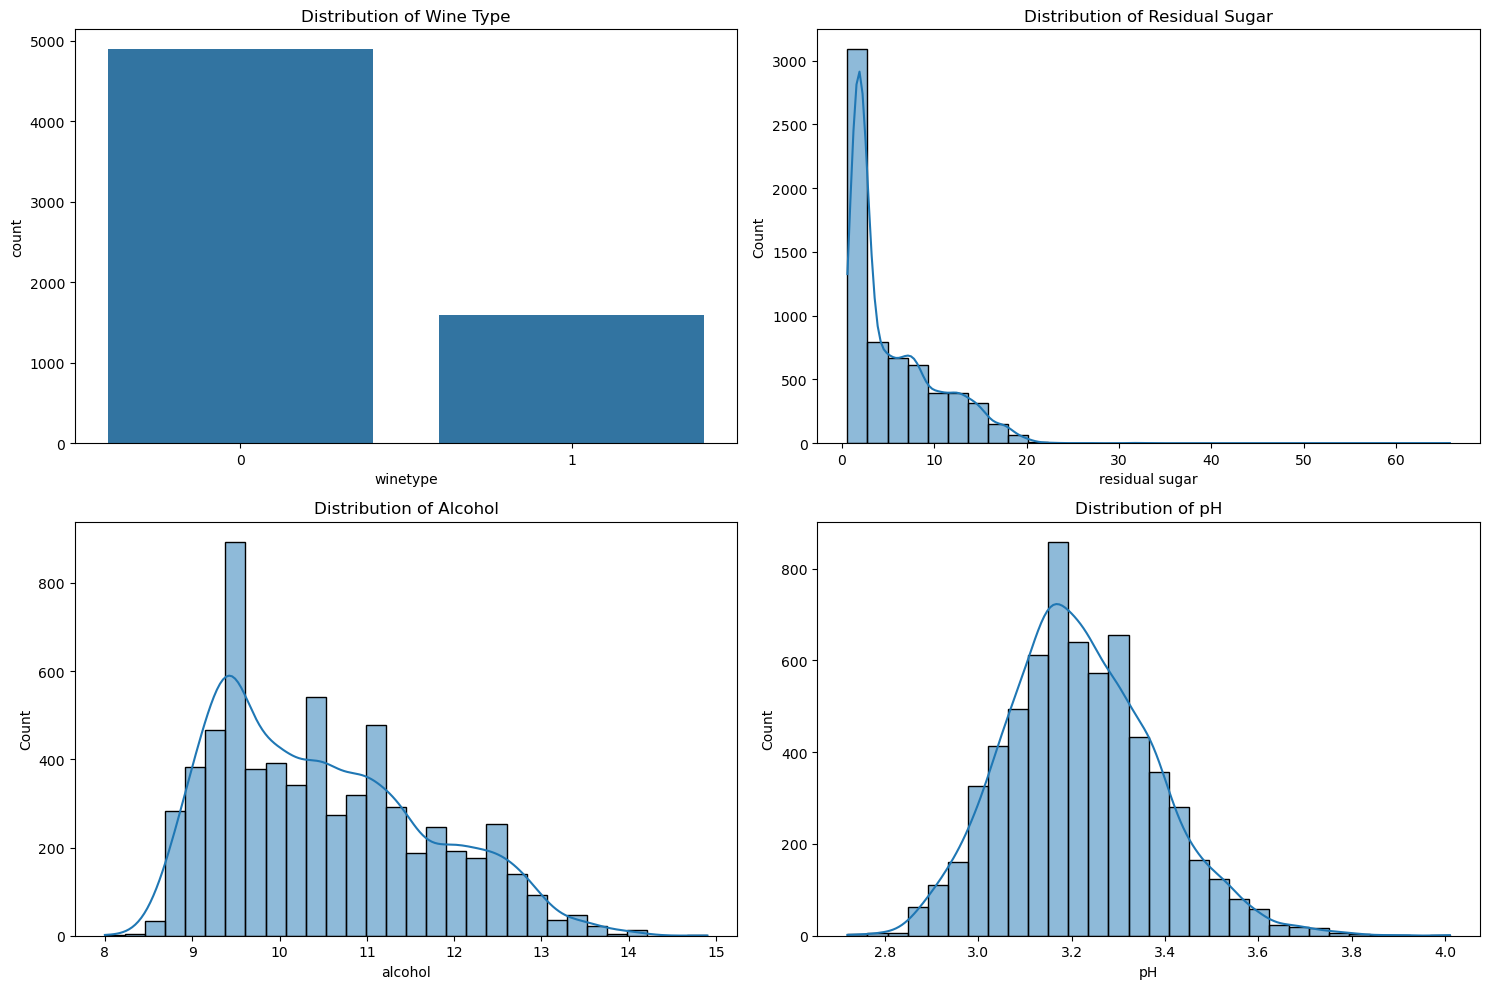

In [26]:
variables = ['winetype', 'residual sugar', 'alcohol', 'pH']
titles = ['Distribution of Wine Type', 'Distribution of Residual Sugar', 
          'Distribution of Alcohol', 'Distribution of pH']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    if var == 'winetype':
        sns.countplot(x=var, data=df_combined)
    else:
        sns.histplot(df_combined[var], kde=True, bins=30)
    plt.title(titles[i])

plt.tight_layout()
plt.show()

## Q4
**Split data into training and test sets. Build models that evaluate the relationship between all available quantitative X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN (for classification) using cross-validation. How different are the results?**

In [27]:
X_Q2 = df_combined.drop('winetype', axis=1)  
y_Q2 = df_combined['winetype']
X_train, X_test, y_train, y_test = train_test_split(X_Q2, y_Q2, test_size=0.2, random_state=42)

In [28]:
models = {
   'Logistic Regression': LogisticRegression(solver='liblinear', random_state=43),
        'Penalized Logistic Regression (L1)': LogisticRegression(solver='liblinear', penalty='l1', random_state=43),
        'Penalized Logistic Regression (L2)': LogisticRegression(solver='liblinear', penalty='l2', random_state=43),
        'KNN Regressor': KNeighborsRegressor()
}

results_list_Q2 = []

for name, model in models.items():
    train_score, test_score, cv_score = run_model(model, X_train, y_train, X_test, y_test)
    results_list_Q2.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'CV Score': cv_score
    })

results_df_Q2 = pd.DataFrame(results_list_Q2)

results_df_Q2

,Model,Train Score,Test Score,CV Score
0,Logistic Regression,0.983452,0.975385,0.900353
1,Penalized Logistic Regression (L1),0.988455,0.980769,0.931826
2,Penalized Logistic Regression (L2),0.983452,0.975385,0.900353
3,KNN Regressor,0.842221,0.766252,0.750149


## Q5
**Try running your models from the previous question with and without StandardScaler. Does using StandardScaler help?**

In [29]:
models = {
   'Logistic Regression': LogisticRegression(solver='liblinear', random_state=43),
        'Penalized Logistic Regression (L1)': LogisticRegression(solver='liblinear', penalty='l1', random_state=43),
        'Penalized Logistic Regression (L2)': LogisticRegression(solver='liblinear', penalty='l2', random_state=43),
        'KNN Regressor': KNeighborsRegressor()
}

results_list_Q2 = []
for name, model in models.items():
    for standard in [False, True]:
        train_score, test_score, cv_score = run_model_standardized(model, X_train, y_train, X_test, y_test, Stand=standard)
        results_list_Q2.append({
            'Model': name,
            'Standardized': 'Yes' if standard else 'No',
            'Train Score': train_score,
            'Test Score': test_score,
            'CV Score': cv_score
        })

results_list_Q2 = pd.DataFrame(results_list_Q2)
results_list_Q2

,Model,Standardized,Train Score,Test Score,CV Score
0,Logistic Regression,No,0.983452,0.975385,0.900353
1,Logistic Regression,Yes,0.994420,0.989231,0.966442
2,Penalized Logistic Regression (L1),No,0.988455,0.980769,0.931826
3,Penalized Logistic Regression (L1),Yes,0.994035,0.990769,0.967490
4,Penalized Logistic Regression (L2),No,0.983452,0.975385,0.900353
5,Penalized Logistic Regression (L2),Yes,0.994420,0.989231,0.966442
6,KNN Regressor,No,0.842221,0.766252,0.750149
7,KNN Regressor,Yes,0.981751,0.956113,0.969747


## Q6
**Tune the parameters of the models where possible using GridSearchCV. Do the results improve?**

In [30]:
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=43),
        'Penalized Logistic Regression (L1)': LogisticRegression(solver='liblinear', penalty='l1', random_state=43),
        'Penalized Logistic Regression (L2)': LogisticRegression(solver='liblinear', penalty='l2', random_state=43),
        'KNeighborsRegressor': KNeighborsRegressor()
}
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Penalized Logistic Regression (L1)': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},  # Parameter grid for L1 Logistic Regression
    'Penalized Logistic Regression (L2)': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'KNeighborsRegressor': {'n_neighbors': [3, 5, 7, 9]}
}

result_grid_Q2 = []
for name, model in models.items():
    param_grid = param_grids[name]  # Get the parameter grid for the current model
    
    for grid in [False, True]:
        if grid:
            param_grid_to_use = param_grid 
        else:
            param_grid_to_use = None  
        
        train_score, test_score, cv_score, grid_search_best_score = run_model_grid(
            model_obj=model,
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            Stand=True,
            param_grid=param_grid_to_use
        )
        
        result_grid_Q2.append({
            'Model': name,
            'GridSearch': 'Yes' if grid else 'No',
            'Train Score': train_score,
            'Test Score': test_score,
            'CV Score': cv_score,
            'Best GridSearchCV Score': grid_search_best_score if grid else 'N/A'
        })

grid_results_df_Q2 = pd.DataFrame(result_grid_Q2)
grid_results_df_Q2

LogisticRegression(random_state=43, solver='liblinear')
LogisticRegression(C=10, random_state=43, solver='liblinear')
LogisticRegression(penalty='l1', random_state=43, solver='liblinear')
LogisticRegression(C=1, penalty='l1', random_state=43, solver='liblinear')
LogisticRegression(random_state=43, solver='liblinear')
LogisticRegression(C=10, random_state=43, solver='liblinear')
KNeighborsRegressor()
KNeighborsRegressor(n_neighbors=3)


,Model,GridSearch,Train Score,Test Score,CV Score,Best GridSearchCV Score
0,Logistic Regression,No,0.994420,0.989231,0.966442,N/A
1,Logistic Regression,Yes,0.994035,0.990000,0.967490,0.96749
2,Penalized Logistic Regression (L1),No,0.994035,0.990769,0.967490,N/A
3,Penalized Logistic Regression (L1),Yes,0.994035,0.990769,0.967490,0.96749
4,Penalized Logistic Regression (L2),No,0.994420,0.989231,0.966442,N/A
5,Penalized Logistic Regression (L2),Yes,0.994035,0.990000,0.967490,0.96749
6,KNeighborsRegressor,No,0.981751,0.956113,0.969747,N/A
7,KNeighborsRegressor,Yes,0.988813,0.960689,0.972161,0.972161


## Q7
**Compare the coefficients for Logistic Regression and Penalized Logistic Regression. Do they agree on which features are important?** \
*  The coefficients from the Logistic Regression and Penalized Logistic Regression models (L1 and L2) show general agreement on the important features, with volatile acidity, residual sugar, density, and alcohol being consistently significant across all models.  \
*  The L1 and L2 penalized versions tend to shrink coefficients, especially in features like fixed acidity and citric acid, compared to the standard Logistic Regression. 

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(C=10.0, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
penalized_log_reg_L1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)
penalized_log_reg_L1.fit(X_train_scaled, y_train)
penalized_log_reg_L2 = LogisticRegression(penalty='l2', solver='liblinear', C=10.0, max_iter=1000)
penalized_log_reg_L2.fit(X_train_scaled, y_train)


coef_log_reg = log_reg.coef_[0]
coef_penalized_L1 = penalized_log_reg_L1.coef_[0]
coef_penalized_L2 = penalized_log_reg_L2.coef_[0]
feature_names = X_train.columns  # Assuming X_train retained its DataFrame structure
coefficients_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Logistic Regression': coef_log_reg,
    'L1 Penalized Logistic Regression': coef_penalized_L1,
    'L2 Penalized Logistic Regression': coef_penalized_L2
})

coefficients_comparison

,Feature,Logistic Regression,L1 Penalized Logistic Regression,L2 Penalized Logistic Regression
0,fixed acidity,0.243401,0.141851,0.226243
1,volatile acidity,1.498660,1.423306,1.483850
2,citric acid,-0.353438,-0.299638,-0.347174
3,residual sugar,-4.645542,-4.226125,-4.561680
4,chlorides,0.884997,0.811791,0.874204
5,free sulfur dioxide,1.188002,1.046658,1.199361
6,total sulfur dioxide,-3.257124,-3.079822,-3.244736
7,density,4.326226,4.156095,4.321979
8,pH,0.069521,0.050658,0.059274
9,sulphates,0.684852,0.642982,0.666869


## Q8
**Discuss which final model you would choose to predict new data**

the L1 Penalized Logistic Regression emerges as the optimal model for predicting new data. It delivers robust performance with a Cross-Validation (CV) Score of 0.96749, closely matching its training (0.994035) and testing scores (0.990769), which suggests good generalization capabilities. 